In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.ticker as ticker
sns.set()
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [16, 9]

In [3]:
def list_data(data):
    data_list = []
    data[data.isnull()] = 0
    for a in [i[1] for i in data.groupby(pd.Grouper(freq='D'))]:
        data_list.extend(list(enumerate(a.tolist())))
    data_np = np.array(data_list)
    data_np1 = data_np[data_np[:,1] != 0]
    return data_np1

In [4]:
def scatter(data):
    data_np1 = list_data(data)
    plt.figure(figsize=(16,9))
    plt.scatter((data_np1)[:,0],np.array(data_np1)[:,1])

In [5]:
def scatter_outlier(data,r,n):
    d = list_data(data)
    clustering = DBSCAN(eps=r, min_samples=n).fit(d)
    plt.figure(figsize=(16,9))
    plt.scatter((d)[:,0][clustering.labels_==-1],(d)[:,1][clustering.labels_==-1],c='r')
    plt.scatter((d)[:,0][clustering.labels_!=-1],(d)[:,1][clustering.labels_!=-1],c='b')

In [8]:
df = pd.read_csv(r'Complied/final_overall_kwhdel_compilation_2016-2020.csv',parse_dates=['Timestamp'], index_col='Timestamp')

In [7]:
dd = df['MD0278ZZ'].copy()

Text(0.5, 1.0, 'AK0031AA - 2017')

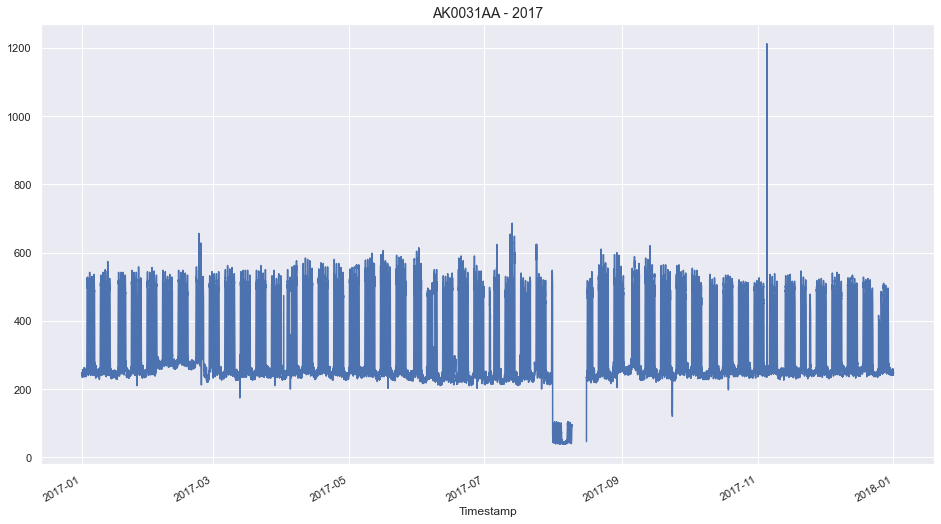

In [32]:
df['AK0031AA']['2017'].plot()
plt.title('AK0031AA - 2017', fontsize=14)

In [19]:
dff['MD0205ZZ']

Timestamp
2021-02-27 00:15:00    46.521
2021-02-27 00:30:00    47.720
2021-02-27 00:45:00    45.641
2021-02-27 01:00:00    47.248
2021-02-27 01:15:00    46.264
                        ...  
2021-05-03 23:00:00    38.664
2021-05-03 23:15:00    37.658
2021-05-03 23:30:00    37.506
2021-05-03 23:45:00    36.786
2021-05-04 00:00:00    38.259
Name: MD0205ZZ, Length: 6332, dtype: float64

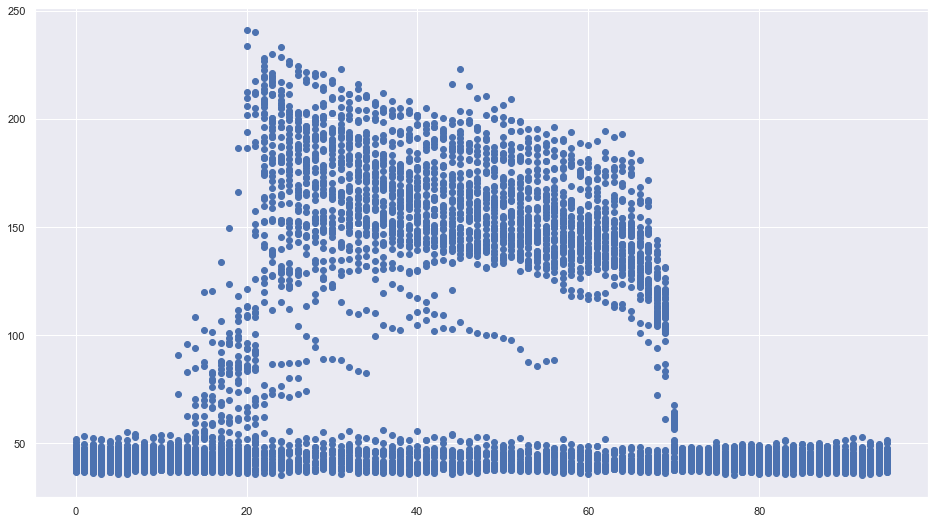

In [20]:
scatter(dff['MD0205ZZ'])

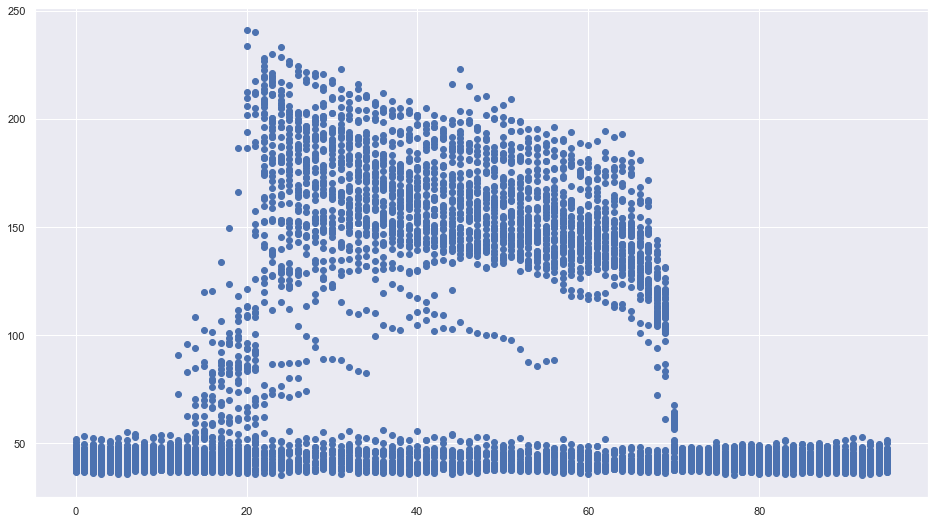

In [26]:
scatter_outlier(dff['MD0205ZZ'], 15, 20)

In [13]:
dd['2020']

Timestamp
2020-01-01 00:00:00        NaN
2020-01-01 00:15:00        NaN
2020-01-01 00:30:00        NaN
2020-01-01 00:45:00        NaN
2020-01-01 01:00:00        NaN
                        ...   
2020-12-30 23:00:00    365.525
2020-12-30 23:15:00    388.111
2020-12-30 23:30:00    367.842
2020-12-30 23:45:00    342.609
2020-12-31 00:00:00    332.107
Name: MD0278ZZ, Length: 35037, dtype: float64

In [6]:
d = df['MO0106ZZ'].copy()

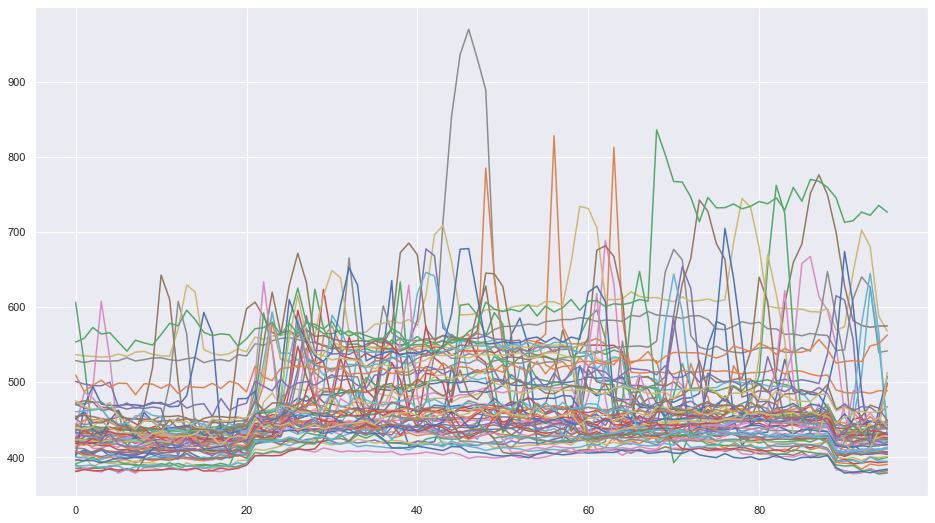

In [7]:
plt.figure(figsize=(16,9))
for i in range(1,367):
    plt.plot(d['2016'][(d['2016'].index.dayofyear == i)&(d['2016'].index.dayofweek > 4)].tolist())

In [15]:
next(iter(a_g))

(Timestamp('2016-01-01 00:00:00', freq='D'),
 Timestamp
 2016-01-01 00:00:00   NaN
 2016-01-01 00:15:00   NaN
 2016-01-01 00:30:00   NaN
 2016-01-01 00:45:00   NaN
 2016-01-01 01:00:00   NaN
                        ..
 2016-01-01 22:45:00   NaN
 2016-01-01 23:00:00   NaN
 2016-01-01 23:15:00   NaN
 2016-01-01 23:30:00   NaN
 2016-01-01 23:45:00   NaN
 Name: MO0106ZZ, Length: 96, dtype: float64)

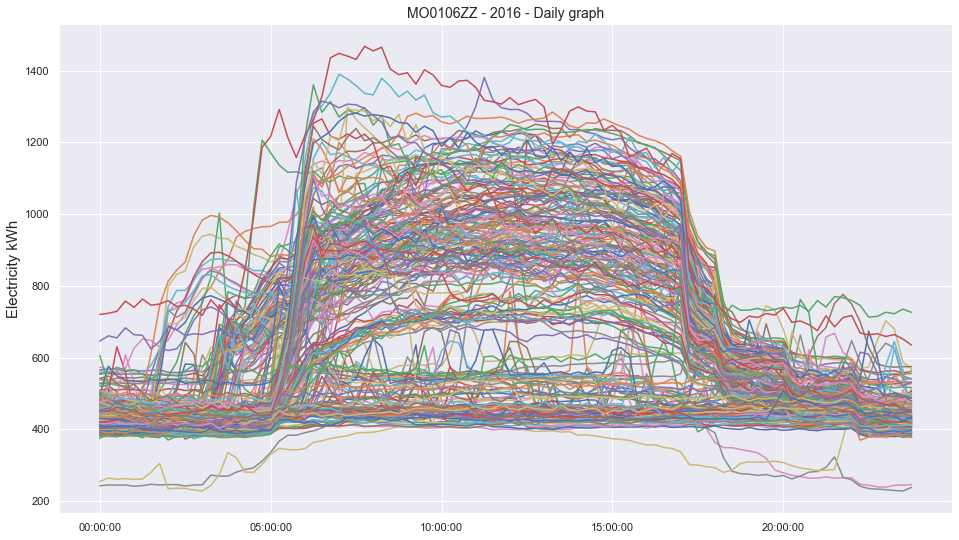

In [20]:
a_g = d['2016'].groupby([pd.Grouper(freq='D')])
fig, ax = plt.subplots()
for text, value in a_g:
    ax.plot([i.strftime("%H:%M:%S") for i in value.index.time], value)
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    plt.ylabel('Electricity kWh', fontsize=15)
    plt.title('MO0106ZZ - 2016 - Daily graph', fontsize=14)

In [26]:
q1 = d['2016'].quantile(0.25)
q3 = d['2016'].quantile(0.75)
irq = q3 - q1
lower_bound = q1 - 1.5 * irq
upper_bound = q3 + 1.5 * irq

In [27]:
(lower_bound, upper_bound)

(-149.3996249999999, 1415.325375)

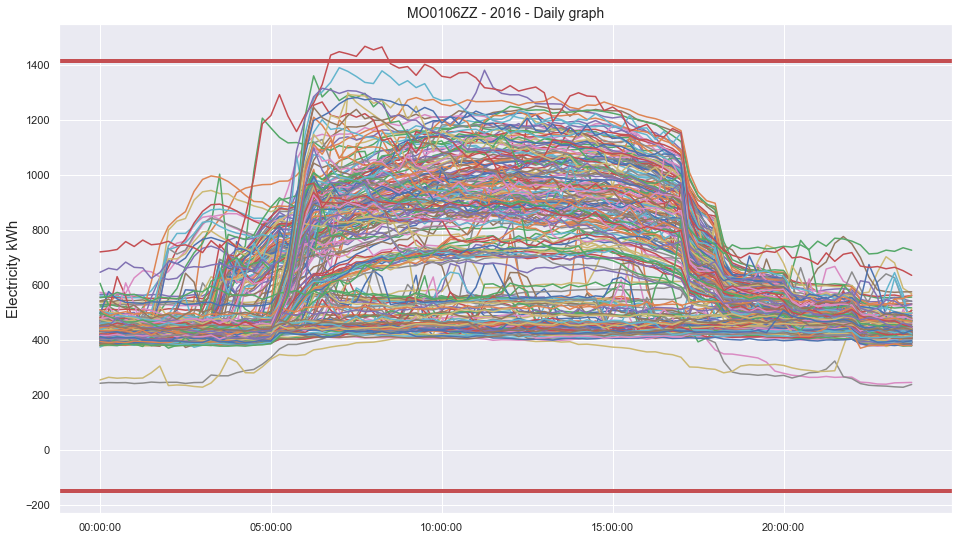

In [29]:
a_g = d['2016'].groupby([pd.Grouper(freq='D')])
fig, ax = plt.subplots()
for text, value in a_g:
    ax.plot([i.strftime("%H:%M:%S") for i in value.index.time], value)
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    plt.ylabel('Electricity kWh', fontsize=15)
    plt.title('MO0106ZZ - 2016 - Daily graph', fontsize=14)
plt.axhline(y = lower_bound, color='r', linewidth = 4)
plt.axhline(y = upper_bound, color='r', linewidth = 4)

In [ ]:
d['2016']

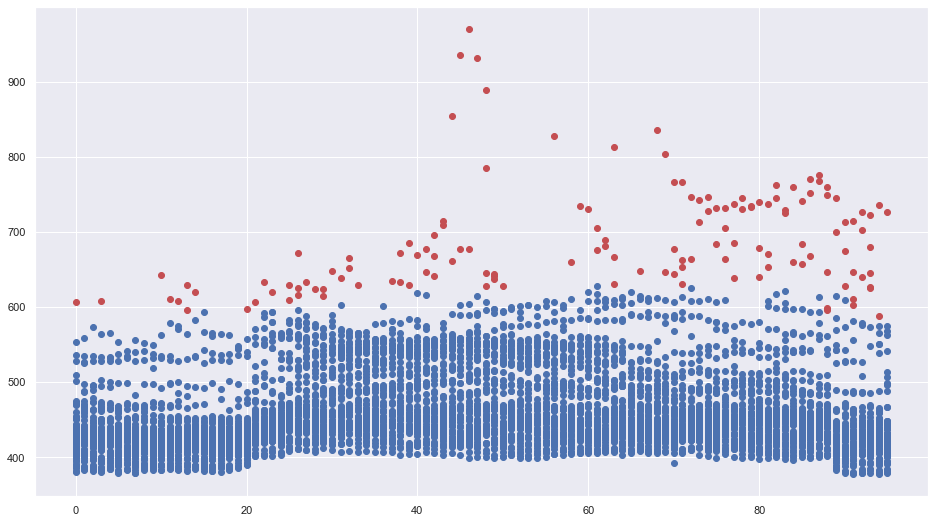

In [18]:
scatter_outlier(d['2016'][(d['2016'].index.dayofweek > 4)],15,30)

Text(0.5, 1.0, 'MO0106ZZ - 2016')

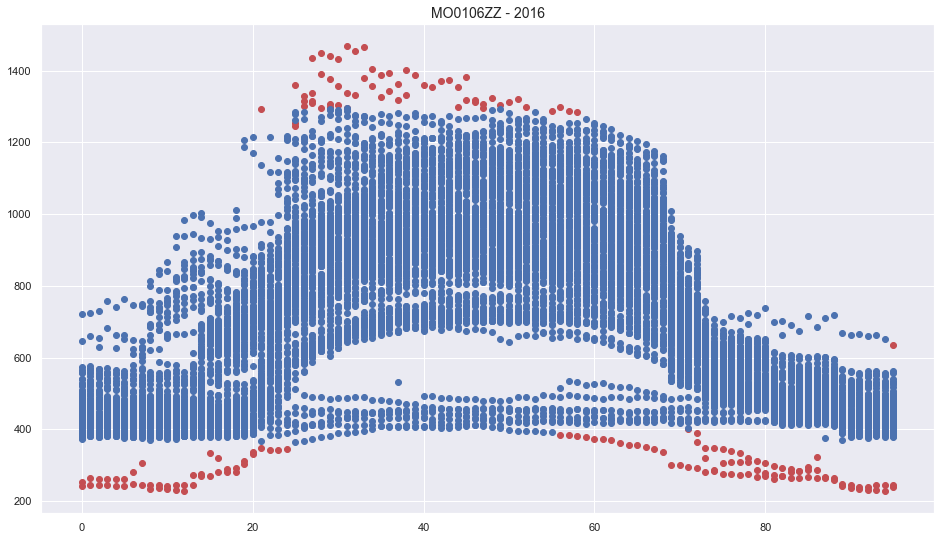

In [30]:
scatter_outlier(d['2016'][(d['2016'].index.dayofweek < 5)],15,30)
plt.title('MO0106ZZ - 2016', fontsize=14)

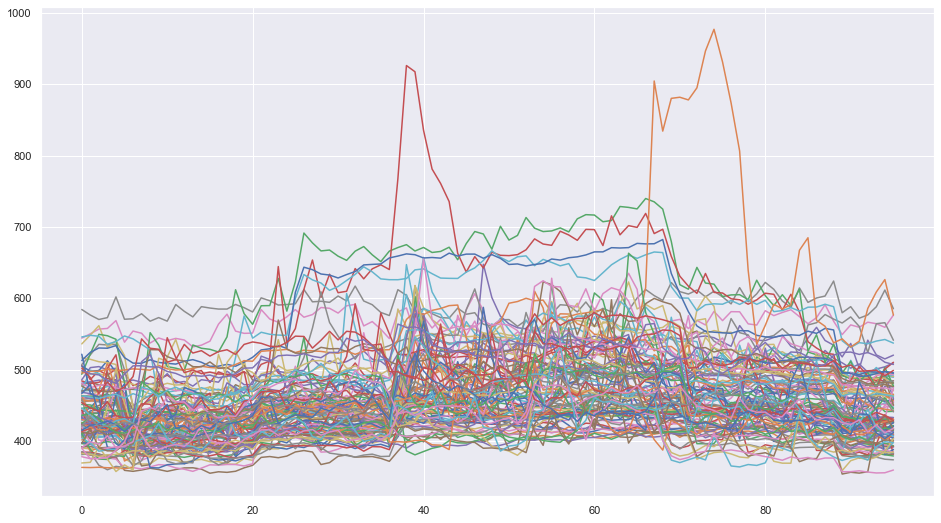

In [7]:
plt.figure(figsize=(16,9))
for i in range(1,367):
    plt.plot(d['2017'][(d['2017'].index.dayofyear == i)&(d['2017'].index.dayofweek > 4)].tolist())

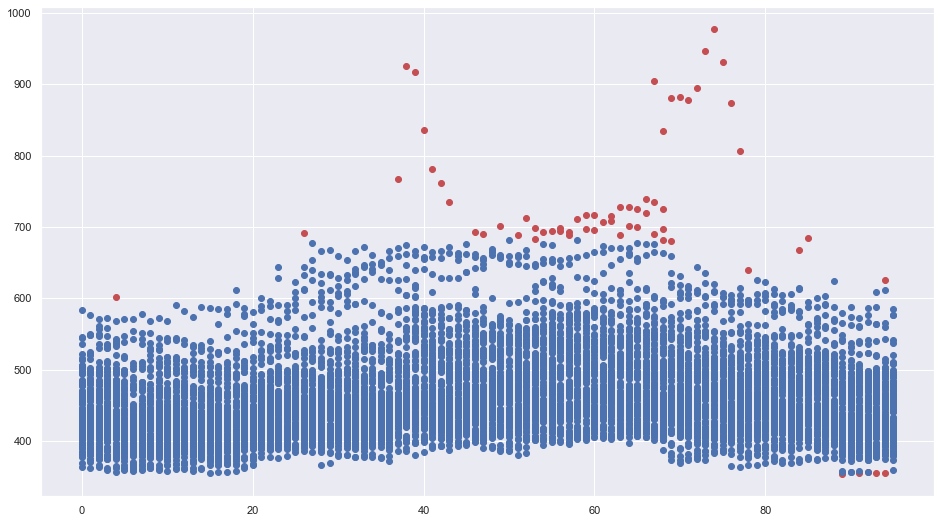

In [19]:
scatter_outlier(d['2017'][(d['2017'].index.dayofweek > 4)],15,30)

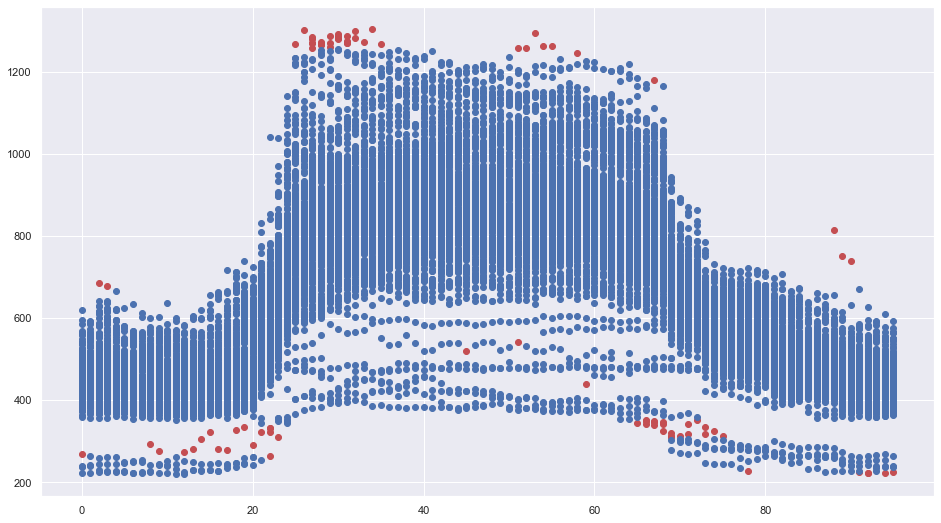

In [20]:
scatter_outlier(d['2017'][(d['2017'].index.dayofweek < 5)],15,30)

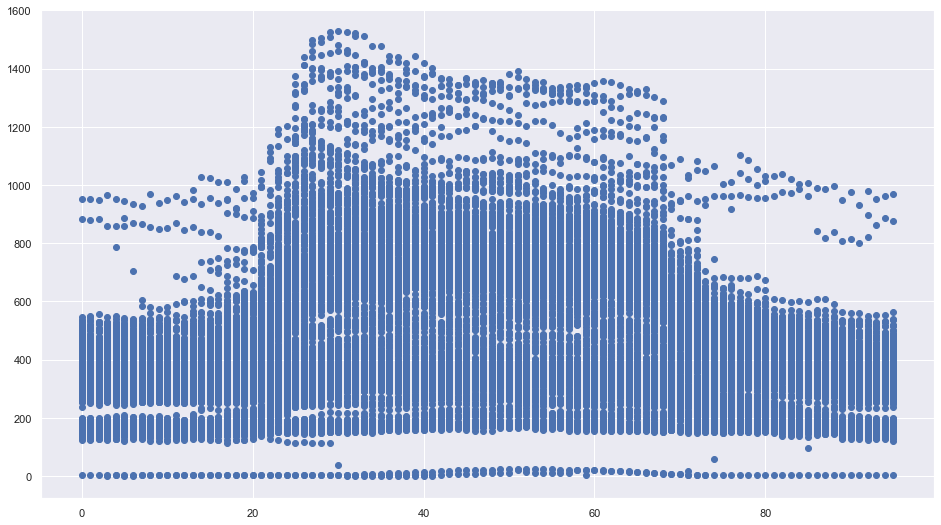

In [10]:
scatter(df['MO0106ZZ'].loc['2018'])

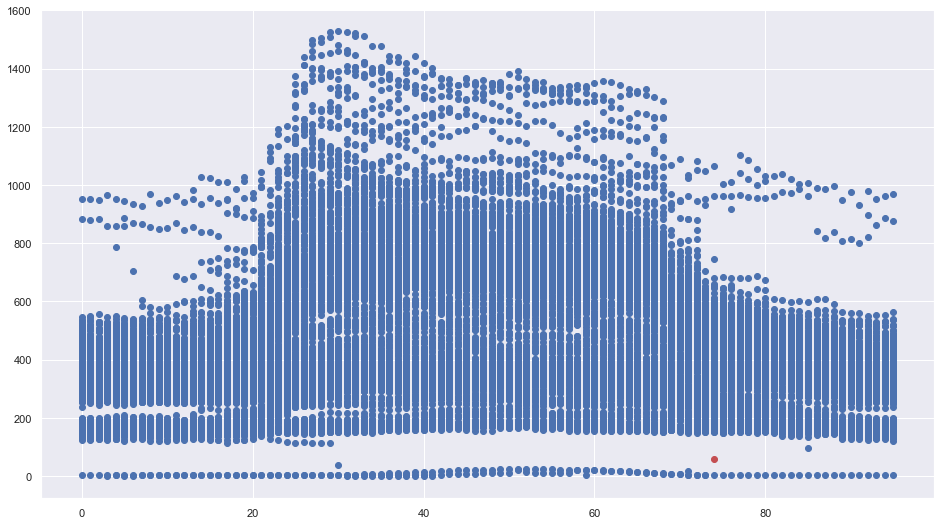

In [15]:
scatter_outlier(df['MO0106ZZ'].loc['2018'], 30, 4)